In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from logistic_regression import MultinomialLogisticRegression
from preprocess import Preprocess
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
raw_train_data = "../data/train.csv"
raw_test_data = "../data/test.csv"

In [16]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

cols = ['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
        "Label"] 

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])
train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')


In [5]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9
count,2.998900e+04,2.998900e+04,2.998900e+04,2.998900e+04,2.998900e+04,2.998900e+04,2.998900e+04,2.998900e+04,2.998900e+04,2.998900e+04
mean,-2.119616e-15,-1.526265e-13,-3.825070e-15,-7.439742e-17,-7.886519e-12,-8.770782e-12,-4.153046e-15,-1.322014e-12,-4.269559e-16,-8.289981e-13
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.230698e+00,-2.390289e+00,-1.702147e+00,-6.609335e+00,-9.061124e+00,-9.081592e+00,-2.163515e+00,-4.418123e+00,-9.816620e-01,-4.385711e+00
25%,-9.439705e-01,-6.300049e-01,-7.746334e-01,-7.189999e-01,-7.180413e-01,-7.162969e-01,-8.368656e-01,-4.697931e-01,-6.698200e-01,-4.127475e-01
50%,6.842328e-01,1.121266e-01,-3.899279e-02,-1.584250e-01,-4.825500e-02,-4.485125e-02,1.238674e-02,2.263594e-01,-3.960074e-01,2.355560e-01
75%,1.083603e+00,9.078224e-01,6.105163e-01,6.058339e-01,5.840900e-01,5.831005e-01,7.572449e-01,7.615106e-01,1.896472e-01,7.117016e-01
max,1.175766e+00,1.465700e+00,4.551860e+00,4.782046e+00,4.484265e+00,4.488067e+00,3.598686e+00,1.588394e+00,2.068306e+00,2.662933e+00


Removendo outliers

In [13]:
threshold = 4
X_train = X_train[
    (np.abs(X_train[:,2]) < threshold) 
    & (np.abs(X_train[:,3]) < threshold)
    & (np.abs(X_train[:,4]) < threshold)
    & (np.abs(X_train[:,5]) < threshold)
    & (np.abs(X_train[:,6]) < threshold)
    & (np.abs(X_train[:,7]) < threshold)
    & (np.abs(X_train[:,8]) < threshold)
    & (np.abs(X_train[:,9]) < threshold),
    :
]

In [15]:
X_train

array([[ 0.69447308,  0.82324282, -1.16649285, ...,  0.75572818,
        -0.41121923,  0.72944906],
       [ 0.69447308,  0.50298152, -0.57286522, ...,  0.26962168,
        -0.41121923,  0.43025037],
       [ 1.07336315,  1.11814644, -1.0845108 , ...,  1.0178838 ,
         0.14401178,  0.55964169],
       ...,
       [-1.21021757, -1.93883597,  0.36615808, ..., -1.98934874,
         2.04548784, -2.7375391 ],
       [ 1.1655256 ,  0.93802019, -1.62716589, ...,  1.23836229,
         0.1744354 ,  1.1469469 ],
       [ 0.70471335,  1.08436315, -1.20684093, ...,  0.92073793,
        -0.41121923,  0.86475622]])

### Training model

In [19]:
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=1000, regularizer=0.1)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_train, valid_y=y_train)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_train, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.7604864365664811
Epoch 200, cross entropy loss: 0.7449606033332898
Epoch 300, cross entropy loss: 0.7408726757678747
Epoch 400, cross entropy loss: 0.7398550647397804
Epoch 500, cross entropy loss: 0.7407586767168708
Epoch 600, cross entropy loss: 0.7429022158740011
Epoch 700, cross entropy loss: 0.7458515636114263
Epoch 800, cross entropy loss: 0.7493591294289564
Epoch 900, cross entropy loss: 0.7532825662289293
Index(['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500',
       'Label'],
      dtype='object')
Confusion Matrix:
[[9267  360 1996]
 [ 508   16   84]
 [1991   80  469]] 

Accuracy:
0.0 



ValueError: operands could not be broadcast together with shapes (14771,) (29989,) 

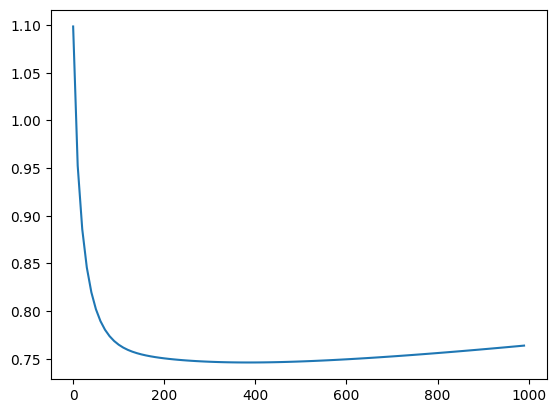

In [ ]:
plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

predictions_2023-10-25 23:37:22.889423_opt_multinomial_all_data

---

In [19]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

cols = ["T200", "Z200", "VBOT", "UBOT",  "T500", "U850", "TS", "TMQ", "V850",
        "Label"] 

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])
train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

Index(['T200', 'Z200', 'VBOT', 'UBOT', 'T500', 'U850', 'TS', 'TMQ', 'V850',
       'Label'],
      dtype='object')


In [21]:
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=1000, regularizer=0.05)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 1.3319577682487105
Epoch 200, cross entropy loss: 1.3522162466581074
Epoch 300, cross entropy loss: 1.3440761903632488
Epoch 400, cross entropy loss: 1.3380537770247012
Epoch 500, cross entropy loss: 1.336133265179013
Epoch 600, cross entropy loss: 1.3364211734399578
Epoch 700, cross entropy loss: 1.3375626636866498
Epoch 800, cross entropy loss: 1.3389168156016933
Epoch 900, cross entropy loss: 1.3402252040101712
Index(['T200', 'Z200', 'VBOT', 'UBOT', 'T500', 'U850', 'TS', 'TMQ', 'V850',
       'Label'],
      dtype='object')
Confusion Matrix:
[[3534 5259 2836]
 [  48  482   48]
 [ 226  667 1671]] 

Accuracy:
0.385 

Precision:
0.4567 

Recall:
0.5965 

F1 Score:
0.5173


---

In [7]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_test_data)

test_df, test_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"], is_test=True)

test_data = test_df[['lat', 'TS', 'Z1000', 'U850', 'PS', 'PSL', 'TMQ', 'Z200', 'lon', 'T500']].to_numpy()

test_data = preproc.normalize_data(test_data)

In [8]:
test_data.shape

(10320, 10)

In [9]:
y_pred_test = model.predict(X=test_data)

In [10]:
submition = raw_data['SNo'].reset_index().copy()
submition['Label'] = pd.Series(y_pred_test)
submition.drop("index", axis=1, inplace=True)
submition.to_csv(f"predictions_{datetime.now()}.csv", index=False)